In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import tensorflow_probability as tfp

In [13]:
gdrdata = pd.read_csv('/content/gdr experimental.csv')
gdrdata

,Z,A,delta,El Reac,E1[MeV],CS1[mb],W1[MeV],E2[MeV],CS2[mb],W2[MeV],E_{min}-E_{max}[MeV]
0,6,14,0.142857,C 2,16.68,7.5,3.1,25.87,9.4,6.84,9.0 - 30.0
1,8,18,0.111111,O 2,16.60,5.7,7.82,24.07,12.1,4.71,11.2 - 26.0
2,11,23,0.043478,Na 2,17.39,12.1,2.9,20.94,25,4.55,14.0 - 23.0
3,12,24,0.000000,Mg 2,19.75,28.6,2.82,24.62,19.6,5.84,16.3 - 26.0
4,12,26,0.076923,Mg 2,17.43,17.1,2.08,23.50,39.4,6.84,16.0 - 26.0
...,...,...,...,...,...,...,...,...,...,...,...
67,92,238,0.226891,U 0,11.21,269.4,1.99,14.13,378.3,4.96,10.8 - 18.8
68,92,238,0.226891,U 8,10.94,296.8,2.64,13.99,379.8,4.56,9.0 - 18.0
69,92,238,0.226891,U 8,10.78,315.9,2.39,13.81,455.5,5.08,9.0 - 18.0
70,94,239,0.213389,Pu 0,10.59,261.7,4.17,14.00,337.2,5.44,10.8 - 18.8


In [14]:
gdrdata.head(15)

,Z,A,delta,El Reac,E1[MeV],CS1[mb],W1[MeV],E2[MeV],CS2[mb],W2[MeV],E_{min}-E_{max}[MeV]
0,6,14,0.142857,C 2,16.68,7.5,3.1,25.87,9.4,6.84,9.0 - 30.0
1,8,18,0.111111,O 2,16.60,5.7,7.82,24.07,12.1,4.71,11.2 - 26.0
2,11,23,0.043478,Na 2,17.39,12.1,2.9,20.94,25,4.55,14.0 - 23.0
3,12,24,0.000000,Mg 2,19.75,28.6,2.82,24.62,19.6,5.84,16.3 - 26.0
4,12,26,0.076923,Mg 2,17.43,17.1,2.08,23.50,39.4,6.84,16.0 - 26.0
5,14,28,0.000000,Si 2,19.73,28.4,2.24,21.56,44.9,4.03,16.7 - 23.0
6,23,51,0.098039,V 2,17.72,47.3,3.74,22.20,72,9.81,15.2 - 25.0
7,23,51,0.098039,V 3,17.90,60.3,4.55,21.26,26.4,4.37,14.0 - 23.0
8,23,51,0.098039,V 6,17.98,57.7,3.79,21.11,37.1,6.26,14.0 - 23.0
9,25,55,0.090909,Mn 3,16.43,27.1,2.95,19.77,52,8.61,14.0 - 23.0


In [16]:
ade2 = gdrdata.drop(['Z','El Reac','CS1[mb]','E1[MeV]','E2[MeV]','W1[MeV]','W2[MeV]','CS2[mb]','E_{min}-E_{max}[MeV]'],axis = 1).to_numpy()
ade2

array([[1.40000000e+01, 1.42857143e-01],
       [1.80000000e+01, 1.11111111e-01],
       [2.30000000e+01, 4.34782610e-02],
       [2.40000000e+01, 0.00000000e+00],
       [2.60000000e+01, 7.69230770e-02],
       [2.80000000e+01, 0.00000000e+00],
       [5.10000000e+01, 9.80392160e-02],
       [5.10000000e+01, 9.80392160e-02],
       [5.10000000e+01, 9.80392160e-02],
       [5.50000000e+01, 9.09090910e-02],
       [5.90000000e+01, 8.47457630e-02],
       [5.90000000e+01, 8.47457630e-02],
       [6.00000000e+01, 6.66666670e-02],
       [6.00000000e+01, 6.66666670e-02],
       [6.30000000e+01, 7.93650790e-02],
       [6.30000000e+01, 7.93650790e-02],
       [6.30000000e+01, 7.93650790e-02],
       [6.40000000e+01, 6.25000000e-02],
       [7.40000000e+01, 1.35135135e-01],
       [7.50000000e+01, 1.20000000e-01],
       [7.50000000e+01, 1.20000000e-01],
       [7.60000000e+01, 1.57894737e-01],
       [7.80000000e+01, 1.28205128e-01],
       [1.27000000e+02, 1.65354331e-01],
       [1.270000

In [17]:
y = gdrdata['E2[MeV]'].to_numpy()
y

array([25.87, 24.07, 20.94, 24.62, 23.5 , 21.56, 22.2 , 21.26, 21.11,
       19.77, 18.78, 18.64, 18.78, 18.49, 20.13, 19.62, 19.08, 19.16,
       17.02, 17.59, 18.12, 18.87, 18.42, 16.3 , 17.8 , 15.7 , 15.49,
       16.03, 15.73, 15.78, 15.71, 15.94, 15.79, 15.66, 15.86, 16.  ,
       15.95, 15.48, 15.58, 15.78, 15.54, 15.67, 15.47, 15.7 , 15.61,
       14.99, 15.22, 15.24, 14.93, 14.94, 15.05, 14.89, 14.89, 15.27,
       14.88, 14.63, 14.36, 14.36, 13.75, 14.18, 13.87, 13.97, 14.23,
       13.41, 13.8 , 14.1 , 14.06, 14.13, 13.99, 13.81, 14.  , 13.9 ])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(ade2, y,train_size = 0.90)
print(len(x_train))

64


In [28]:
x_train.shape, x_test.shape

((64, 2), (8, 2))

In [29]:
x_train[:,1]

array([0.18421053, 0.19337017, 0.07936508, 0.22689076, 0.21030043,
       0.22689076, 0.09090909, 0.21338912, 0.11111111, 0.21518987,
       0.16535433, 0.18238994, 0.17647059, 0.22413793, 0.18857143,
       0.21518987, 0.08474576, 0.18787879, 0.19101124, 0.09803922,
       0.17948718, 0.06666667, 0.21367521, 0.14285714, 0.18681319,
       0.22689076, 0.18918919, 0.2       , 0.08474576, 0.18787879,
       0.1954023 , 0.19148936, 0.09803922, 0.18787879, 0.2       ,
       0.09803922, 0.16535433, 0.20430107, 0.19047619, 0.12820513,
       0.        , 0.0625    , 0.20430107, 0.07936508, 0.15789474,
       0.22413793, 0.2       , 0.13513513, 0.1827957 , 0.12      ,
       0.22413793, 0.06666667, 0.20833333, 0.21702128, 0.16535433,
       0.04347826, 0.19565217, 0.12      , 0.2       , 0.1957672 ,
       0.19337017, 0.        , 0.19480519, 0.18238994])

In [30]:
ade2

array([[1.40000000e+01, 1.42857143e-01],
       [1.80000000e+01, 1.11111111e-01],
       [2.30000000e+01, 4.34782610e-02],
       [2.40000000e+01, 0.00000000e+00],
       [2.60000000e+01, 7.69230770e-02],
       [2.80000000e+01, 0.00000000e+00],
       [5.10000000e+01, 9.80392160e-02],
       [5.10000000e+01, 9.80392160e-02],
       [5.10000000e+01, 9.80392160e-02],
       [5.50000000e+01, 9.09090910e-02],
       [5.90000000e+01, 8.47457630e-02],
       [5.90000000e+01, 8.47457630e-02],
       [6.00000000e+01, 6.66666670e-02],
       [6.00000000e+01, 6.66666670e-02],
       [6.30000000e+01, 7.93650790e-02],
       [6.30000000e+01, 7.93650790e-02],
       [6.30000000e+01, 7.93650790e-02],
       [6.40000000e+01, 6.25000000e-02],
       [7.40000000e+01, 1.35135135e-01],
       [7.50000000e+01, 1.20000000e-01],
       [7.50000000e+01, 1.20000000e-01],
       [7.60000000e+01, 1.57894737e-01],
       [7.80000000e+01, 1.28205128e-01],
       [1.27000000e+02, 1.65354331e-01],
       [1.270000

In [40]:
hidden_units = [10, 10]
learning_rate = 0.001
num_epochs = 100

def run_experiment(model, loss, x_train,y_train,x_test,y_test):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=loss,
        metrics=[keras.metrics.RootMeanSquaredError()],
    )

    print("Start training the model...")
    model.fit(x_train,y_train, epochs=num_epochs, validation_data=(x_test,y_test))
    print("Model training finished.")
    _, rmse = model.evaluate(x_train,y_train, verbose=0)
    print(f"Train RMSE: {round(rmse, 3)}")

    print("Evaluating model performance...")
    _, rmse = model.evaluate(x_test,y_test, verbose=0)
    print(f"Test RMSE: {round(rmse, 3)}")


In [41]:
# Define the prior weight distribution as Normal of mean=0 and stddev=1.
# Note that, in this example, the we prior distribution is not trainable,
# as we fix its parameters.
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model


# Define variational posterior weight distribution as multivariate Gaussian.
# Note that the learnable parameters for this distribution are the means,
# variances, and covariances.
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model


In [42]:
def create_bnn_model(train_size):
    inputs = layers.Input(shape=(2,), name="input")
    features = layers.BatchNormalization()(inputs)

    # Create hidden layers with weight uncertainty using the DenseVariational layer.
    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)

    # The output is a distribution of possible values, so we use the tfp.layers.DistributionLambda layer.
    outputs = tfp.layers.DenseVariational(
        units=1,
        make_prior_fn=prior,
        make_posterior_fn=posterior,
        kl_weight=1 / train_size,
    )(features)
    outputs = tfp.layers.DistributionLambda(lambda x: tfp.distributions.Normal(loc=x, scale=1))(outputs)

    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

In [44]:
num_epochs = 1500
mse_loss = keras.losses.MeanSquaredError()
E2_Bnn = create_bnn_model(int(x_train.size ))
run_experiment(E2_Bnn, mse_loss, x_train,y_train,x_test,y_test)

Start training the model...
Epoch 1/1500
2/2 [==============================] - 4s 994ms/step - loss: 273.7793 - root_mean_squared_error: 16.5426 - val_loss: 226.9541 - val_root_mean_squared_error: 15.0612
Epoch 2/1500
2/2 [==============================] - 0s 33ms/step - loss: 297.7865 - root_mean_squared_error: 17.2520 - val_loss: 223.3004 - val_root_mean_squared_error: 14.9379
Epoch 3/1500
2/2 [==============================] - 0s 34ms/step - loss: 329.9757 - root_mean_squared_error: 18.1624 - val_loss: 243.3020 - val_root_mean_squared_error: 15.5937
Epoch 4/1500
2/2 [==============================] - 0s 32ms/step - loss: 265.1280 - root_mean_squared_error: 16.2780 - val_loss: 391.6130 - val_root_mean_squared_error: 19.7854
Epoch 5/1500
2/2 [==============================] - 0s 33ms/step - loss: 308.6482 - root_mean_squared_error: 17.5643 - val_loss: 271.5794 - val_root_mean_squared_error: 16.4748
Epoch 6/1500
2/2 [==============================] - 0s 33ms/step - loss: 322.7558 - ro

In [45]:
E2_Bnn.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 batch_normalization_5 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_variational_15 (Dense  (None, 10)               495       
 Variational)                                                    
                                                                 
 dense_variational_16 (Dense  (None, 10)               6215      
 Variational)                                                    
                                                                 
 dense_variational_17 (Dense  (None, 1)                77        
 Variational)                                              

In [46]:
E2_Bnn.evaluate(x_train,y_train)

2/2 [==============================] - 0s 8ms/step - loss: 7.7778 - root_mean_squared_error: 2.7035


[7.7778167724609375, 2.703533411026001]

In [47]:
_, rmse_1 = E2_Bnn.evaluate(x_train, y_train, verbose=0)
print(f"Test RMSE: {rmse_1}")

Test RMSE: 2.4752373695373535


In [48]:
y_pred = E2_Bnn.predict(ade2)
y_pred

3/3 [==============================] - 1s 4ms/step


array([[18.576805],
       [18.406029],
       [18.450748],
       [19.63353 ],
       [19.777645],
       [19.562246],
       [18.729149],
       [18.135853],
       [18.712343],
       [17.926609],
       [19.593159],
       [18.409067],
       [19.377625],
       [19.893501],
       [17.70883 ],
       [17.894396],
       [16.562447],
       [16.832973],
       [17.913576],
       [19.665512],
       [17.403605],
       [18.406885],
       [18.240795],
       [19.277185],
       [17.901358],
       [18.185085],
       [16.374954],
       [18.862108],
       [18.09796 ],
       [19.322166],
       [18.815369],
       [18.154205],
       [16.052174],
       [14.230699],
       [15.675424],
       [14.341221],
       [14.330112],
       [16.244535],
       [14.926453],
       [14.584076],
       [13.995956],
       [15.482751],
       [15.044263],
       [14.812538],
       [14.725228],
       [15.613158],
       [17.032557],
       [14.964509],
       [16.029716],
       [14.787244],


In [49]:
y.shape

(72,)

In [50]:
y_pred.shape

(72, 1)

In [51]:
y_pred.reshape(-1)

array([18.576805, 18.406029, 18.450748, 19.63353 , 19.777645, 19.562246,
       18.729149, 18.135853, 18.712343, 17.926609, 19.593159, 18.409067,
       19.377625, 19.893501, 17.70883 , 17.894396, 16.562447, 16.832973,
       17.913576, 19.665512, 17.403605, 18.406885, 18.240795, 19.277185,
       17.901358, 18.185085, 16.374954, 18.862108, 18.09796 , 19.322166,
       18.815369, 18.154205, 16.052174, 14.230699, 15.675424, 14.341221,
       14.330112, 16.244535, 14.926453, 14.584076, 13.995956, 15.482751,
       15.044263, 14.812538, 14.725228, 15.613158, 17.032557, 14.964509,
       16.029716, 14.787244, 14.229492, 13.225368, 14.938403, 13.846357,
       14.479994, 14.478529, 13.578296, 13.540134, 12.62247 , 12.01095 ,
       11.162158, 11.756773, 13.610068, 13.330588, 15.217987, 16.548216,
       16.44267 , 14.75233 , 13.806887, 15.766718, 14.90348 , 14.985793],
      dtype=float32)

In [52]:
y_pred.shape

(72, 1)

In [53]:
df1 = (pd.DataFrame([ade2[:,0],ade2[:,1],y,y_pred.reshape(-1)]).T)
df1

,0,1,2,3
0,14.0,0.142857,25.87,18.576805
1,18.0,0.111111,24.07,18.406029
2,23.0,0.043478,20.94,18.450748
3,24.0,0.000000,24.62,19.633530
4,26.0,0.076923,23.50,19.777645
...,...,...,...,...
67,238.0,0.226891,14.13,14.752330
68,238.0,0.226891,13.99,13.806887
69,238.0,0.226891,13.81,15.766718
70,239.0,0.213389,14.00,14.903480


In [55]:
ade1 = gdrdata.drop(['Z','El Reac','CS1[mb]','E1[MeV]','E2[MeV]','W1[MeV]','W2[MeV]','CS2[mb]','E_{min}-E_{max}[MeV]'],axis = 1).to_numpy()
ade1

array([[1.40000000e+01, 1.42857143e-01],
       [1.80000000e+01, 1.11111111e-01],
       [2.30000000e+01, 4.34782610e-02],
       [2.40000000e+01, 0.00000000e+00],
       [2.60000000e+01, 7.69230770e-02],
       [2.80000000e+01, 0.00000000e+00],
       [5.10000000e+01, 9.80392160e-02],
       [5.10000000e+01, 9.80392160e-02],
       [5.10000000e+01, 9.80392160e-02],
       [5.50000000e+01, 9.09090910e-02],
       [5.90000000e+01, 8.47457630e-02],
       [5.90000000e+01, 8.47457630e-02],
       [6.00000000e+01, 6.66666670e-02],
       [6.00000000e+01, 6.66666670e-02],
       [6.30000000e+01, 7.93650790e-02],
       [6.30000000e+01, 7.93650790e-02],
       [6.30000000e+01, 7.93650790e-02],
       [6.40000000e+01, 6.25000000e-02],
       [7.40000000e+01, 1.35135135e-01],
       [7.50000000e+01, 1.20000000e-01],
       [7.50000000e+01, 1.20000000e-01],
       [7.60000000e+01, 1.57894737e-01],
       [7.80000000e+01, 1.28205128e-01],
       [1.27000000e+02, 1.65354331e-01],
       [1.270000

In [56]:
y1 = gdrdata['E1[MeV]'].to_numpy()
y1

array([16.68, 16.6 , 17.39, 19.75, 17.43, 19.73, 17.72, 17.9 , 17.98,
       16.43, 16.66, 16.43, 16.43, 16.3 , 16.37, 16.24, 16.72, 16.23,
       14.51, 14.98, 15.19, 15.48, 14.97, 14.25, 14.58, 14.61, 12.78,
       12.3 , 12.39, 12.33, 12.19, 12.27, 12.46, 12.22, 12.08, 12.2 ,
       12.23, 12.38, 12.01, 12.28, 12.09, 12.5 , 12.32, 12.42, 12.55,
       12.19, 12.32, 12.31, 12.52, 11.98, 11.92, 13.04, 12.59, 13.04,
       12.81, 12.64, 12.64, 12.64, 10.37, 11.27, 11.04, 11.1 , 11.08,
       11.11, 10.93, 11.01, 10.98, 11.21, 10.94, 10.78, 10.59, 11.31])

In [57]:
x1_train, x1_test, y1_train, y1_test = train_test_split(ade1, y1,train_size = 0.85)
print(len(x1_train))

61


In [58]:
num_epochs = 1500
mse_loss = keras.losses.MeanSquaredError()
E1_bnn = create_bnn_model(int(x1_train.size ))
run_experiment(E1_bnn, mse_loss, x1_train,y1_train,x1_test,y1_test)

Start training the model...
Epoch 1/1500
2/2 [==============================] - 5s 1s/step - loss: 208.7313 - root_mean_squared_error: 14.4436 - val_loss: 140.8189 - val_root_mean_squared_error: 11.8619
Epoch 2/1500
2/2 [==============================] - 0s 34ms/step - loss: 186.2611 - root_mean_squared_error: 13.6446 - val_loss: 159.4386 - val_root_mean_squared_error: 12.6242
Epoch 3/1500
2/2 [==============================] - 0s 55ms/step - loss: 201.6306 - root_mean_squared_error: 14.1946 - val_loss: 229.1186 - val_root_mean_squared_error: 15.1333
Epoch 4/1500
2/2 [==============================] - 0s 36ms/step - loss: 178.9074 - root_mean_squared_error: 13.3689 - val_loss: 145.4241 - val_root_mean_squared_error: 12.0545
Epoch 5/1500
2/2 [==============================] - 0s 35ms/step - loss: 165.0664 - root_mean_squared_error: 12.8441 - val_loss: 188.2553 - val_root_mean_squared_error: 13.7181
Epoch 6/1500
2/2 [==============================] - 0s 37ms/step - loss: 194.9293 - root_

In [59]:
E1_bnn.evaluate(x1_train,y1_train)

2/2 [==============================] - 0s 8ms/step - loss: 4.8322 - root_mean_squared_error: 2.0939


[4.8322343826293945, 2.093939781188965]

In [60]:
_, rmse_2 = E1_bnn.evaluate(x1_train, y1_train, verbose=0)
print(f"Test RMSE: {rmse_2}")

Test RMSE: 1.9033299684524536


In [61]:
y_pred1 = E1_bnn.predict(ade1)
y_pred1

3/3 [==============================] - 1s 4ms/step


array([[15.547596 ],
       [14.341887 ],
       [16.157776 ],
       [15.841455 ],
       [16.037724 ],
       [16.880901 ],
       [16.248915 ],
       [15.081097 ],
       [17.389671 ],
       [13.2422905],
       [15.087926 ],
       [16.736294 ],
       [15.350624 ],
       [14.589513 ],
       [17.449505 ],
       [16.654057 ],
       [14.8278265],
       [13.989382 ],
       [15.095689 ],
       [15.641064 ],
       [16.544699 ],
       [15.216507 ],
       [16.48634  ],
       [16.351727 ],
       [15.262654 ],
       [14.747135 ],
       [15.694411 ],
       [15.803249 ],
       [15.144117 ],
       [14.067426 ],
       [15.292177 ],
       [13.781093 ],
       [14.395132 ],
       [12.149602 ],
       [12.259987 ],
       [13.57486  ],
       [14.732265 ],
       [13.637023 ],
       [13.619821 ],
       [13.108735 ],
       [13.767177 ],
       [12.143396 ],
       [12.936641 ],
       [13.576214 ],
       [10.413321 ],
       [11.849556 ],
       [11.829336 ],
       [11.74

In [62]:
y_pred1.reshape(-1)

array([15.547596 , 14.341887 , 16.157776 , 15.841455 , 16.037724 ,
       16.880901 , 16.248915 , 15.081097 , 17.389671 , 13.2422905,
       15.087926 , 16.736294 , 15.350624 , 14.589513 , 17.449505 ,
       16.654057 , 14.8278265, 13.989382 , 15.095689 , 15.641064 ,
       16.544699 , 15.216507 , 16.48634  , 16.351727 , 15.262654 ,
       14.747135 , 15.694411 , 15.803249 , 15.144117 , 14.067426 ,
       15.292177 , 13.781093 , 14.395132 , 12.149602 , 12.259987 ,
       13.57486  , 14.732265 , 13.637023 , 13.619821 , 13.108735 ,
       13.767177 , 12.143396 , 12.936641 , 13.576214 , 10.413321 ,
       11.849556 , 11.829336 , 11.741243 , 14.554214 , 12.199381 ,
       10.305992 , 12.578153 , 11.909313 , 13.792291 , 14.163795 ,
       12.901697 , 11.0898485, 11.779499 , 10.190829 , 10.752268 ,
       11.015408 , 10.327758 , 11.804432 , 11.834568 , 11.215133 ,
        9.890688 , 11.646803 ,  8.75088  , 11.08238  ,  9.693989 ,
       10.770817 , 10.545931 ], dtype=float32)

In [63]:
df2 = (pd.DataFrame([ade1[:,0],ade1[:,1],y1,y_pred1.reshape(-1)]).T)
df2

,0,1,2,3
0,14.0,0.142857,16.68,15.547596
1,18.0,0.111111,16.60,14.341887
2,23.0,0.043478,17.39,16.157776
3,24.0,0.000000,19.75,15.841455
4,26.0,0.076923,17.43,16.037724
...,...,...,...,...
67,238.0,0.226891,11.21,8.750880
68,238.0,0.226891,10.94,11.082380
69,238.0,0.226891,10.78,9.693989
70,239.0,0.213389,10.59,10.770817


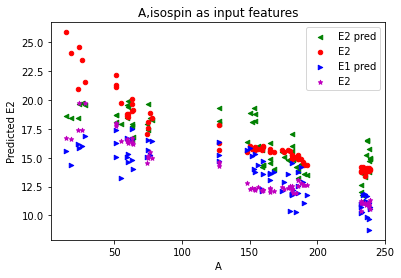

In [64]:
ax = df1.plot(kind='scatter', x=0, y=3, marker='<',color = 'g',label="E2 pred")
ax1 = df1.plot(kind = 'scatter',x=0 , y=2,marker = 'o',color = 'r',label="E2",ax = ax)
ax2 = df2.plot(kind = 'scatter',x=0,y=3,marker='>',color = 'b',label = "E1 pred",ax = ax)
ax3 = df2.plot(kind = 'scatter',x=0,y=2,marker='*',color = 'm',label = "E2",ax = ax)
ax.set_xlabel('A')
ax.set_ylabel('Predicted E2')
ax.set_title('A,isospin as input features')
plt.show()